In [9]:
%config IPCompleter.greedy=True

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

In [11]:
datasus = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"
                      ,encoding='iso-8859-1',sep=';',skiprows=3,thousands='.',decimal=',')

In [12]:
datasus = datasus.iloc[:27]

In [13]:
pd.options.display.float_format = "{:.2f}".format

In [14]:
datasus["2020/Ago"] = datasus["2020/Ago"].apply(lambda x: x.replace('-','0').replace(',','.')).astype('float')

In [15]:
datasus['Unidade da Federação'] = datasus['Unidade da Federação'].str.replace('\d+.','')

In [16]:
colunas = datasus.mean().index.tolist()

In [17]:
colunas.insert(0,'Unidade da Federação')

In [18]:
datasus = datasus[colunas]

In [19]:
datasus = datasus.set_index('Unidade da Federação')

In [20]:
top_5_estados = datasus.sort_values(by='Total',ascending=False).copy()

In [21]:
datasus.drop(columns=['Total'],axis=0,inplace=True)
top_5_estados.drop(columns=['Total'],axis=0,inplace=True)

In [22]:
top_5_estados = top_5_estados.iloc[:5]

In [23]:
datasus = datasus.T
top_5_estados = top_5_estados.T

In [24]:
datasus.tail()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,...,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,...,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,...,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,...,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26
2020/Ago,3556381.57,0.00,4726485.73,1524478.04,11559714.54,834187.31,2453362.74,10916718.78,7926321.69,14559529.59,...,10824255.26,36264322.65,140414944.95,41542401.16,16991236.43,28349257.38,4059220.22,6174224.99,20242641.73,12044848.02


In [25]:
datasus = datasus.iloc[17:-8] / 1000000
top_5_estados = top_5_estados.iloc[17:-8] / 1000000
top_5_estados.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro
2009/Jan,192.32,99.02,60.38,61.52,60.87
2009/Fev,178.60,83.68,57.24,52.10,40.66
2009/Mar,216.95,100.24,69.07,65.11,52.75
2009/Abr,215.05,91.83,64.05,61.59,48.90
2009/Mai,212.89,97.29,68.69,64.40,51.17


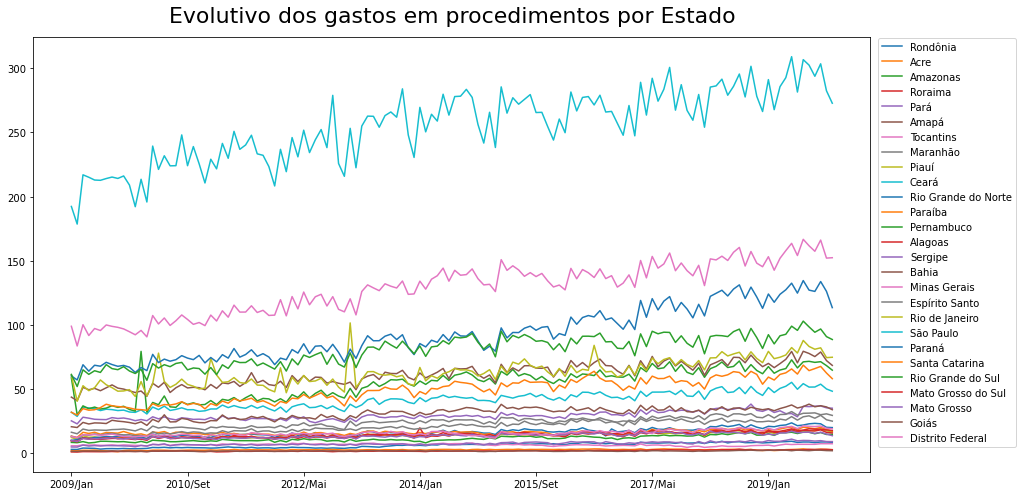

In [26]:
datasus.plot(figsize=(15,8))
plt.title("Evolutivo dos gastos em procedimentos por Estado", y=1.02, fontsize=22)
plt.legend(loc='upper right',bbox_to_anchor=(1.18, 1.01))
ax = plt.gca()
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

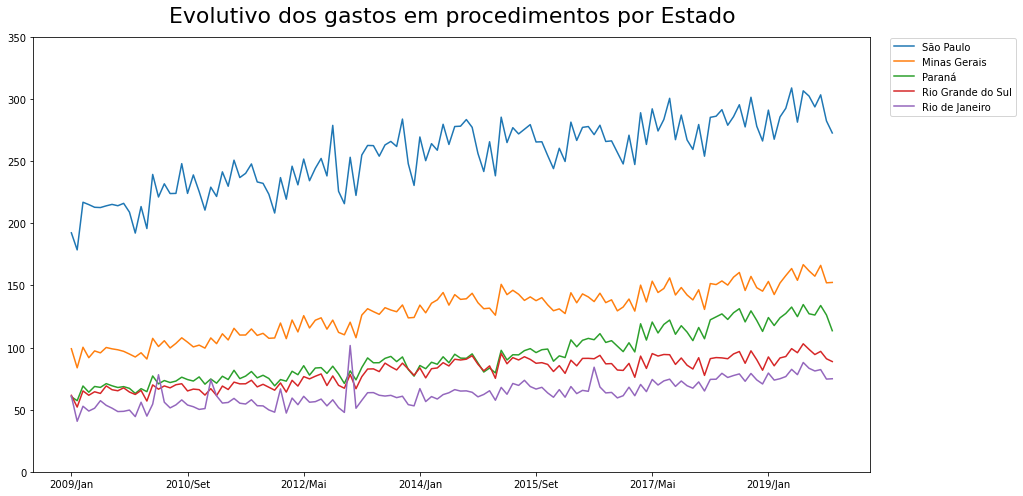

In [28]:
top_5_estados.plot(figsize=(15,8))
plt.title("Evolutivo dos gastos em procedimentos por Estado", y=1.02, fontsize=22)
plt.legend(loc='upper right',bbox_to_anchor=(1.18, 1.01))
ax = plt.gca()
plt.ylim(0,350)
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

In [29]:
top_5_estados.columns

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro'],
      dtype='object', name='Unidade da Federação')

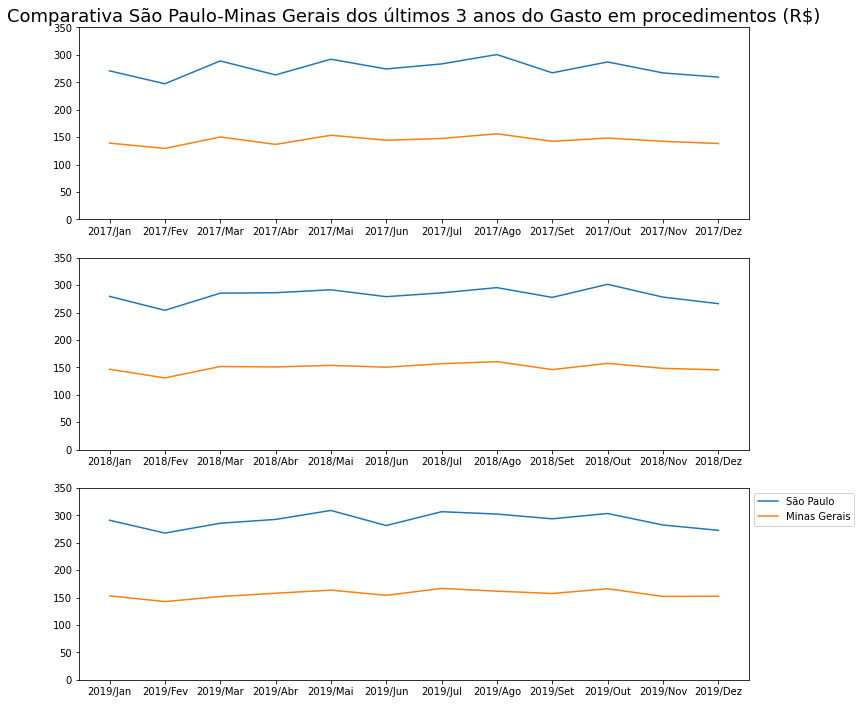

In [30]:
f, (ax1, ax2,ax3) = plt.subplots(3, 1, sharey=True,figsize=(12, 12))

ax1.plot(top_5_estados['São Paulo'].iloc[-36:-24],label='São Paulo')
ax1.plot(top_5_estados['Minas Gerais'].iloc[-36:-24],label='Minas Gerais')

ax2.plot(top_5_estados['São Paulo'].iloc[-24:-12],label='São Paulo')
ax2.plot(top_5_estados['Minas Gerais'].iloc[-24:-12],label='Minas Gerais')

ax3.plot(top_5_estados['São Paulo'].iloc[-12:],label='São Paulo')
ax3.plot(top_5_estados['Minas Gerais'].iloc[-12:],label='Minas Gerais')
ax1.set_ylim((0,350))
ax2.set_ylim((0,350))
ax3.set_ylim((0,350))
plt.legend(loc='best',bbox_to_anchor=(1, 1))
ax1.set_title("Comparativa São Paulo-Minas Gerais dos últimos 3 anos do Gasto em procedimentos (R$)", fontsize=18)
    

plt.show()
    

Text(0.5, 1.02, 'Comparativa São Paulo-Minas Gerais dos últimos 3 anos do Gasto em procedimentos (R$)')

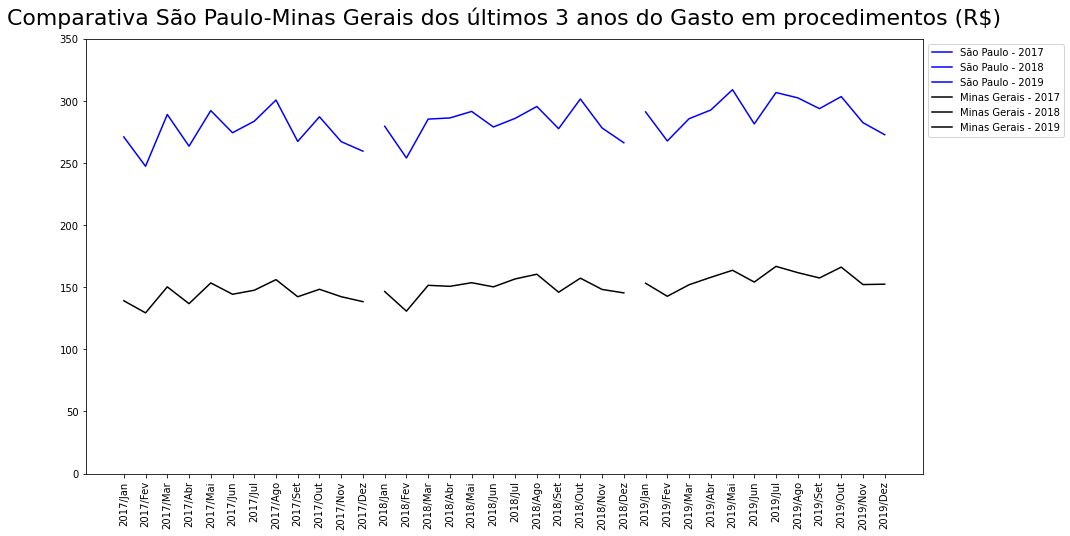

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.plot(top_5_estados['São Paulo'].iloc[-36:-24], label='São Paulo - 2017',color='blue')
plt.plot(top_5_estados['São Paulo'].iloc[-24:-12], label='São Paulo - 2018',color='blue')
plt.plot(top_5_estados['São Paulo'].iloc[-12:], label='São Paulo - 2019',color='blue')

plt.plot(top_5_estados['Minas Gerais'].iloc[-36:-24], label='Minas Gerais - 2017', color='black')
plt.plot(top_5_estados['Minas Gerais'].iloc[-24:-12], label='Minas Gerais - 2018', color='black')
plt.plot(top_5_estados['Minas Gerais'].iloc[-12:], label='Minas Gerais - 2019', color='black')

plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.ylim(0,350)
plt.title("Comparativa São Paulo-Minas Gerais dos últimos 3 anos do Gasto em procedimentos (R$)", y=1.02, fontsize=22)

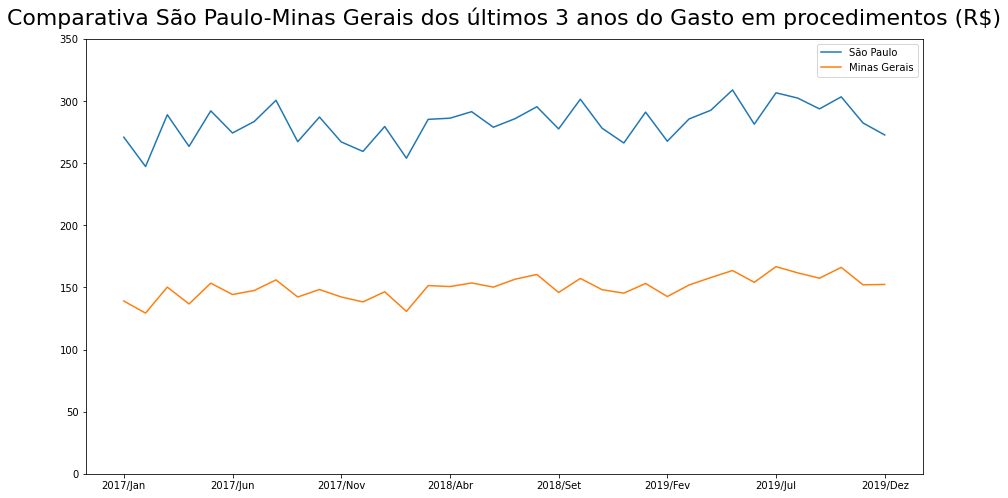

In [32]:
top_5_estados['São Paulo'].iloc[-36:].plot(figsize=(15,8))
top_5_estados['Minas Gerais'].iloc[-36:].plot(figsize=(15,8))
#plt.xticks(rotation=90)
plt.title("Comparativa São Paulo-Minas Gerais dos últimos 3 anos do Gasto em procedimentos (R$)", y=1.02, fontsize=22)
plt.legend(loc='upper right',bbox_to_anchor=(1, 1))
ax = plt.gca()
plt.ylim(0,350)
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

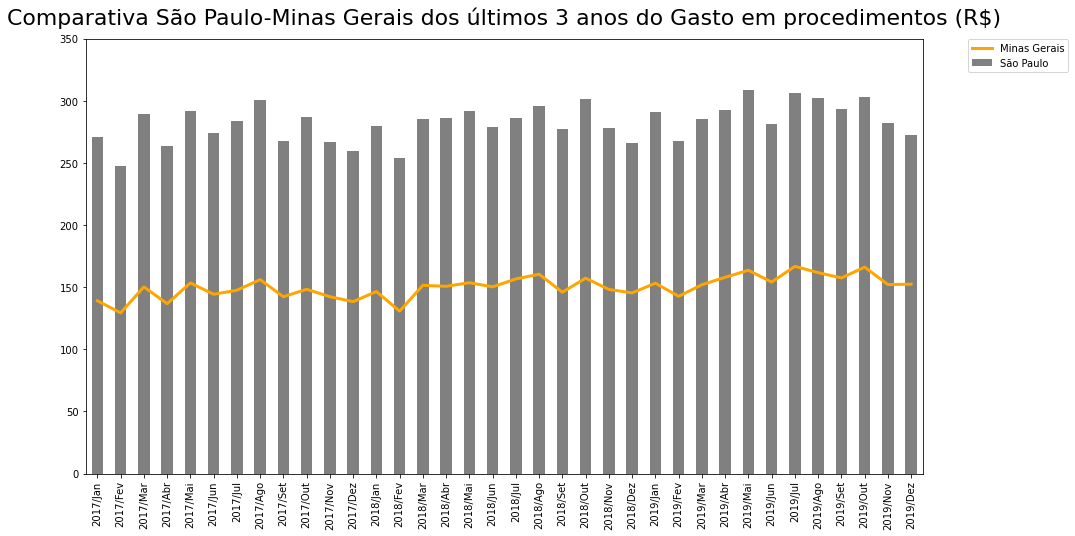

In [33]:
top_5_estados['São Paulo'].iloc[-36:].plot(kind='bar',figsize=(15,8),color='grey')
top_5_estados['Minas Gerais'].iloc[-36:].plot(kind='line',figsize=(15,8),color='orange',linewidth=3)
plt.xticks(rotation=90)
plt.title("Comparativa São Paulo-Minas Gerais dos últimos 3 anos do Gasto em procedimentos (R$)", y=1.02, fontsize=22)
plt.legend(loc='upper right',bbox_to_anchor=(1.18, 1.01))
ax = plt.gca()
plt.ylim(0,350)
# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

# Analise do gasto em Procedimentos

### Analise Inicial

'Top 5 Estados que mais gastam'
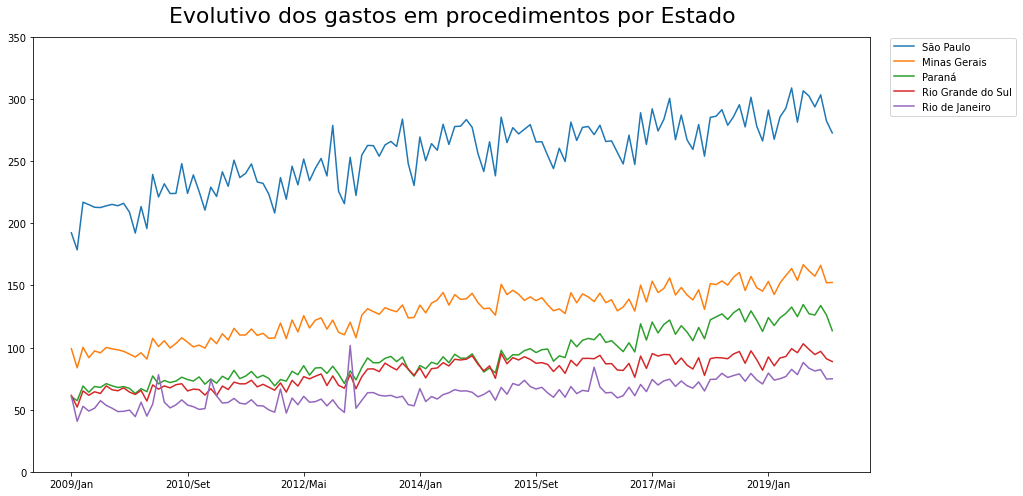

`Como o gasto de São Paulo é muito maior comparado com os outros estados, vamos comparar contra o segundo Estado que mais gasta para saber qual a diferença entre eles.`

### Comparativas São Paulo - Mina Gerais

* Plotagem dos últimos 3 anos segmentado por anos:
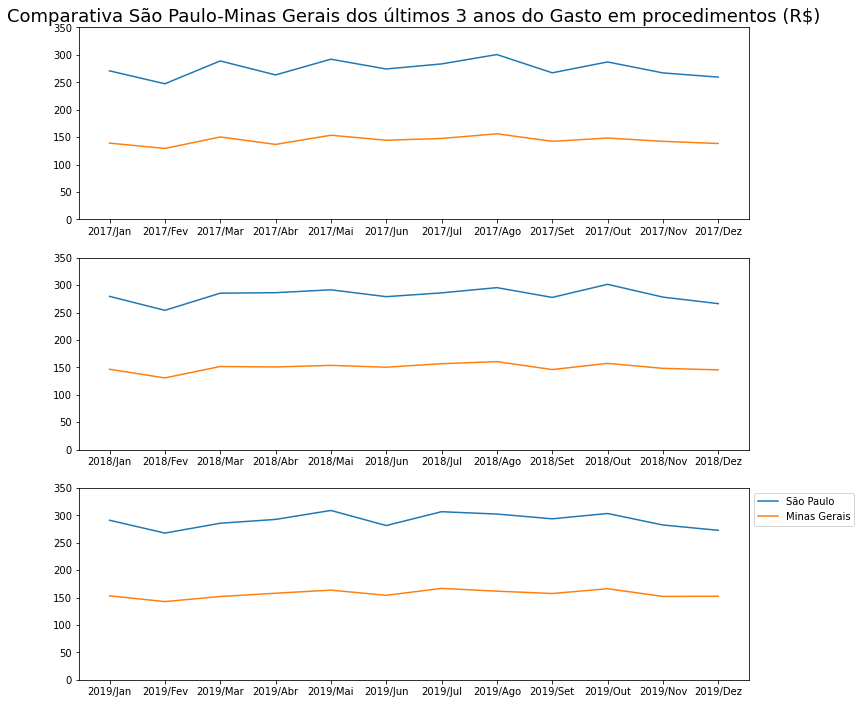

`Com este plot fica difícil perceber a diferença real entre os gastos de São Paulo e Mina Gerais`


* Plotagem do evolutivo dos últimos 3 anos:

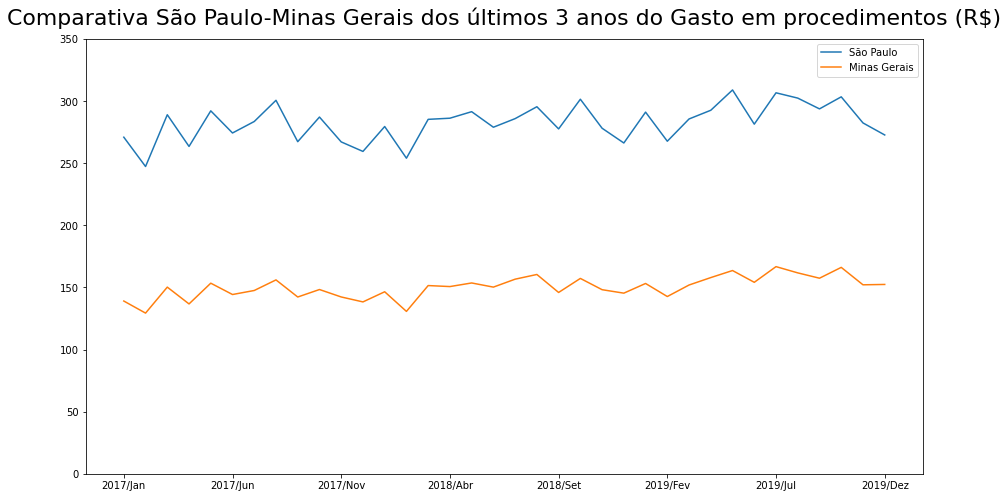

`Ainda com este plot não ficou claro quanto mais São Paulo gasta a respeito do segundo.`


* Plotagem comparativa São Paulo Barras / Minas linha

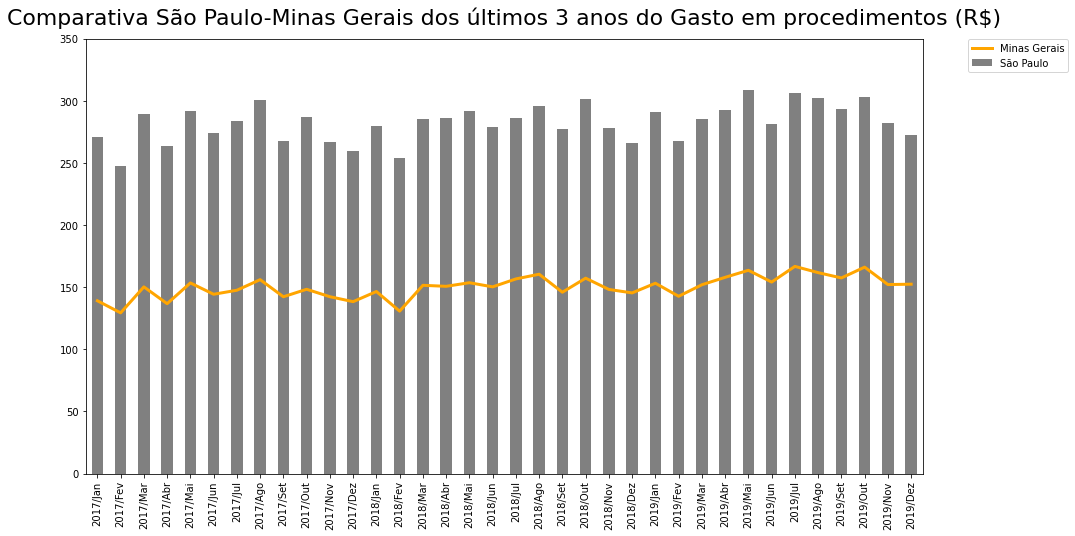

`Com este gráfico fica mais claro que o Estado de São Paulo gasta quase o dobro que o segundo Estado que mais gasta (Mina Gerais)`

